<a href="https://colab.research.google.com/github/adelynliu/Portfolio/blob/main/US_Health_Insurance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up API and Link data

In [1]:
#Install the Kaggle API
!pip install kaggle

In [2]:
#Upload API Key to Google Colab

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adelynliu8487","key":"2f6d5e8d55b1cc1b2b17e62c7e22dfd2"}'}

In [3]:
#Move API Key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
#Set Permissions
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#Download Dataset
!kaggle datasets download -d teertha/ushealthinsurancedataset

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 19.6MB/s]


In [6]:
#Unzip Dataset
!unzip ushealthinsurancedataset.zip

Archive:  ushealthinsurancedataset.zip
  inflating: insurance.csv           


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [8]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le=LabelEncoder()
ss=StandardScaler()
ms=MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [9]:
pip install xgboost


## Data Loading and Inspection

In [53]:
#Read csv data
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
# Check data size
print("These is",df.shape[0],"rows in the data")
print("These is",df.shape[1],"columns in the data")

These is 1338 rows in the data
These is 7 columns in the data


In [55]:
#Summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [56]:
# remove outliners

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-56-f3af92cabb45>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-56-f3af92cabb45>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-56-f3af92cabb45>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(1193, 7)

In [57]:
# count the numbers of each category in columns

sex_counts = df['sex'].value_counts()
smokers_counts = df['smoker'].value_counts()
region_counts = df['region'].value_counts()

print("Sex:")
print(sex_counts)
print()
print("Smokers:")
print(smokers_counts)
print()
print("Region:")
print(region_counts)

Sex:
female    611
male      582
Name: sex, dtype: int64

Smokers:
no     1055
yes     138
Name: smoker, dtype: int64

Region:
northwest    305
southeast    302
northeast    295
southwest    291
Name: region, dtype: int64


## Data Cleaning

In [58]:
# Count of missing values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
# Check data types
data_types = df.dtypes
print("Data types of all columns:")
print(data_types)

Data types of all columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Data Visualization

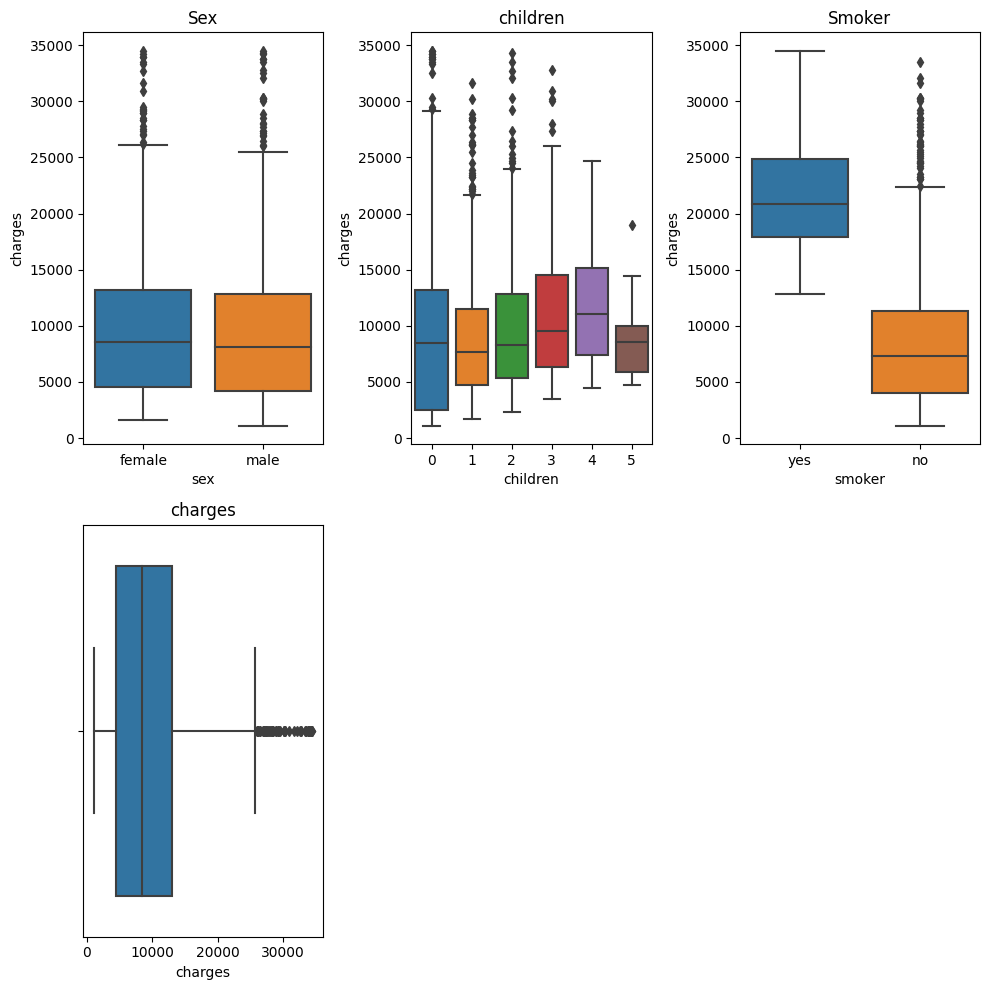

In [60]:
# Create plots for each variable
plt.figure(figsize=(10, 10))

# Box plot for sex vs charges
plt.subplot(2, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex')

# Box plot for children vs charges
plt.subplot(2, 3, 2)
sns.boxplot(x='children', y='charges', data=df)
plt.title('children')

# Box plot for smoker vs charges
plt.subplot(2, 3, 3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker')

# Box plot for  charges
plt.subplot(2, 3, 4)
sns.boxplot(x='charges', data=df)
plt.title('charges')

plt.tight_layout()



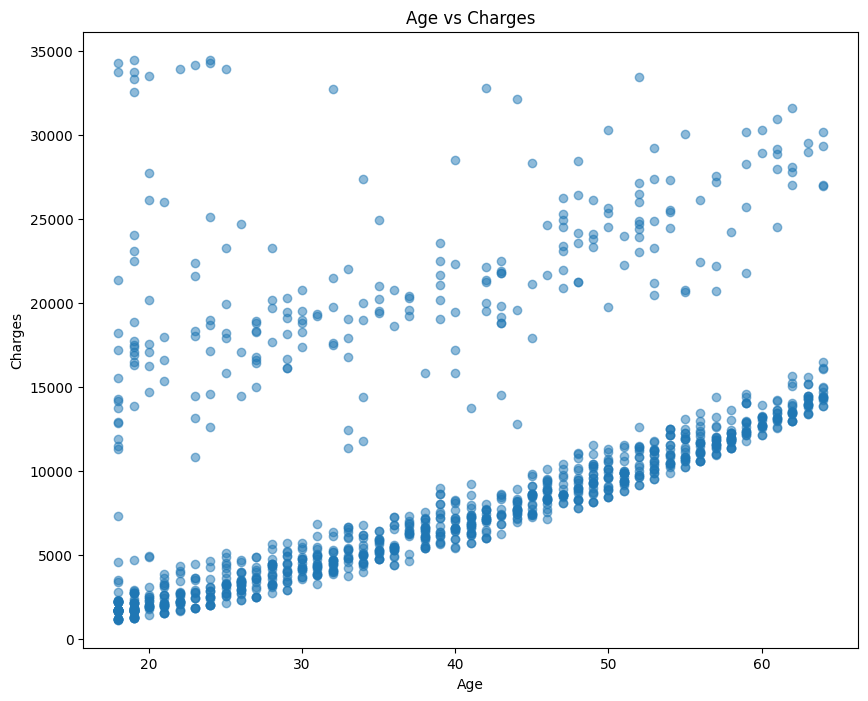

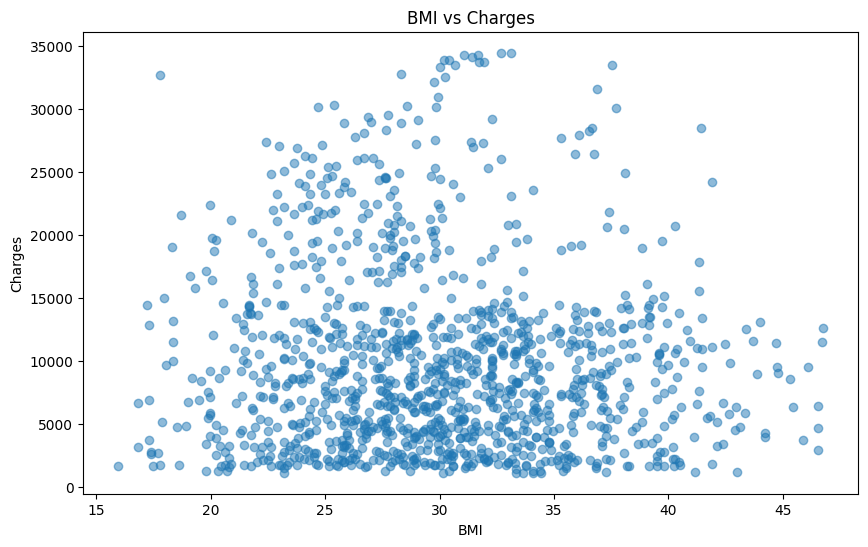

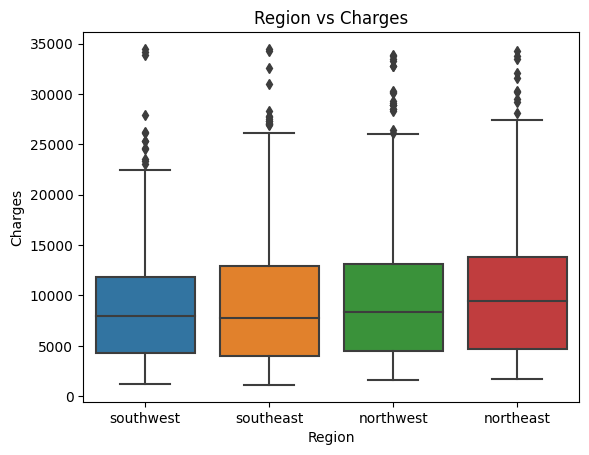

In [61]:
# Scatter plot for Age vs Charges
plt.figure(figsize=(10, 8))
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Scatter plot for BMI vs Charges
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Box plot for Region vs Charges
sns.boxplot(x='region', y='charges',data=df)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


In [62]:
# Converts smoker,female as 1 and non-smoker,male as 0

df['smoker']=le.fit_transform(df['smoker'])
df["sex"]=le.fit_transform(df["sex"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<ipython-input-63-7cdffb9e0a5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


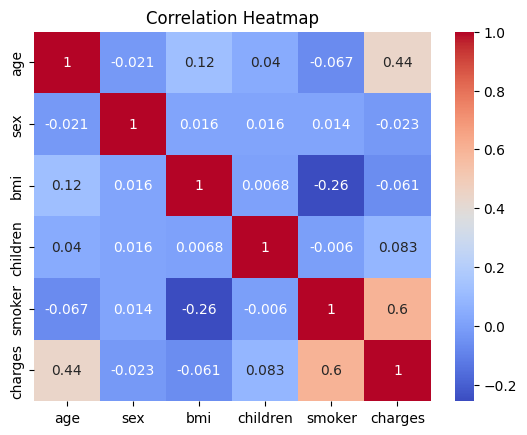

In [63]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [64]:
# Convert region into 0-3
region_mapping = {"southeast": 0, "southwest": 1, "northwest": 2, "northeast": 3}

# Use the map method to apply the mapping to the 'region' column
df['region'] = df['region'].map(region_mapping)

# The 'region' column is now converted to integers from 0 to 3
print(df)


      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       1  16884.92400
1      18    1  33.770         1       0       0   1725.55230
2      28    1  33.000         3       0       0   4449.46200
3      33    1  22.705         0       0       2  21984.47061
4      32    1  28.880         0       0       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       2  10600.54830
1334   18    0  31.920         0       0       3   2205.98080
1335   18    0  36.850         0       0       0   1629.83350
1336   21    0  25.800         0       0       1   2007.94500
1337   61    0  29.070         0       1       2  29141.36030

[1193 rows x 7 columns]


## Hypothesis Testing



#### Charges Depend on BMI:Yes

In [65]:
# Split the data into two groups: charges for individuals with 0 children and charges for individuals with more than 0 children
small_bmi = df[df['bmi'] < 30.4]['charges'] # 50% of bmi is 30.4
larger_bmi = df[df['bmi'] >= 30.4]['charges']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(small_bmi, larger_bmi)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: Bmi significantly affects charges.")
else:
    print("Fail to reject the null hypothesis: Bmi does not significantly affect charges.")


Reject the null hypothesis: Bmi significantly affects charges.


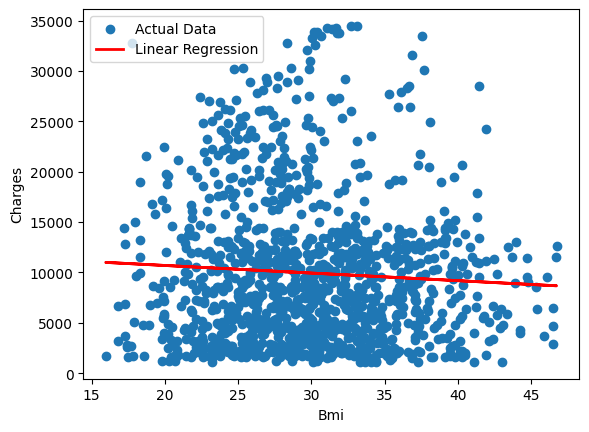

Linear Regression Equation: Charges = 12205.20 + -75.43 * Bmi


In [66]:
X = df[['bmi']]
y = df['charges']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Get the model's coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Print the model equation
print(f"Linear Regression Equation: Charges = {intercept:.2f} + {slope:.2f} * Bmi")


#### Charges Depend on Age(correlation test):Yes



In [67]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['age'], df['charges'])

if p_value < 0.05:
    print("Reject the null hypothesis: Charges depend significantly on age.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between age and charges.")


Reject the null hypothesis: Charges depend significantly on age.


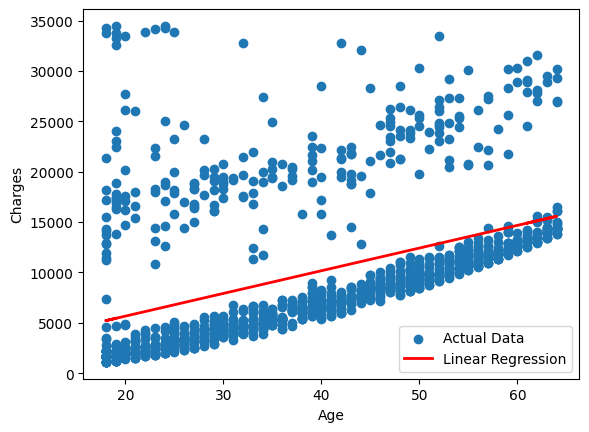

Linear Regression Equation: Charges = 1162.53 + 225.23 * Age


In [68]:
from sklearn.linear_model import LinearRegression

X = df[['age']]  # Independent variable (number of children)
y = df['charges']     # Dependent variable (insurance charges)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Get the model's coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Print the model equation
print(f"Linear Regression Equation: Charges = {intercept:.2f} + {slope:.2f} * Age")


#### Region Affects Charges(ANOVA): Yes

In [69]:
from scipy.stats import f_oneway

regions = df['region'].unique()
grouped_data = [df[df['region'] == region]['charges'] for region in regions]

f_stat, p_value = f_oneway(*grouped_data)

if p_value < 0.05:
    print("Reject the null hypothesis: Charges vary significantly by region.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges across regions.")


Reject the null hypothesis: Charges vary significantly by region.


In [85]:
# Group the data by the 'region' column and calculate the average charges
avg_charges_by_region = df.groupby('region')['charges'].mean()

# Display the average charges for each region
print(avg_charges_by_region)
print("southeast:0, southwest: 1, northwest: 2, northeast: 3")

region
0     9624.134354
1     9021.451259
2    10363.593187
3    10740.681074
Name: charges, dtype: float64
southeast:0, southwest: 1, northwest: 2, northeast: 3


#### Charges Depend on Number of children: Yes

In [70]:
# Split the data into two groups: charges for individuals with 0 children and charges for individuals with more than 0 children
charges_0_children = df[df['children'] == 0]['charges']
charges_more_children = df[df['children'] > 0]['charges']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(charges_0_children, charges_more_children)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis: The number of children significantly affects charges.")
else:
    print("Fail to reject the null hypothesis: The number of children does not significantly affect charges.")


Reject the null hypothesis: The number of children significantly affects charges.


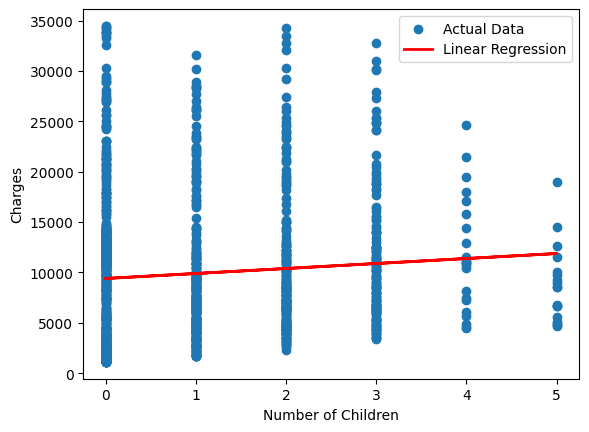

Linear Regression Equation: Charges = 9404.51 + 495.40 * Number of Children


In [71]:
X = df[['children']]  # Independent variable (number of children)
y = df['charges']     # Dependent variable (insurance charges)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Get the model's coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Print the model equation
print(f"Linear Regression Equation: Charges = {intercept:.2f} + {slope:.2f} * Number of Children")


#### Differ Between Smokers and Non-Smokers :No


In [72]:
smokers = df[df['smoker'] == '1']['charges']
non_smokers = df[df['smoker'] == '0']['charges']

t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

if p_value < 0.05:
    print("Reject the null hypothesis: Charges differ significantly between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges between smokers and non-smokers.")


Fail to reject the null hypothesis: No significant difference in charges between smokers and non-smokers.


#### Differ Between Male and Female(T-test) :No

In [73]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on gender
male_charges = df[df['sex'] == '0']['charges']
female_charges = df[df['sex'] == '1']['charges']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(male_charges, female_charges, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("The charges differ significantly between males and females.")
else:
    print("There is no significant difference in charges between males and females.")


There is no significant difference in charges between males and females.
